In [14]:
### Q5
import pandas as pd
import numpy as np
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import seaborn as sns

In [15]:
## (a)
points_a = [None]*(18+1)

# y = 1
points_a[10] = (6, 1)
# y = 2
for i in range(3):
    points_a[6+i] = (3+i, 2)
    points_a[11+i] = (7+i, 2)
# y = 3
points_a[5], points_a[9], points_a[14] = (3, 3), (6, 3), (9, 3)
# y = 4
points_a[4], points_a[15] = (3, 4), (9, 4)
# y = 5
points_a[2], points_a[3] = (2, 5), (4, 5)
points_a[16], points_a[17] = (8, 5), (10, 5)
# y = 6
points_a[1], points_a[18] = (3, 6), (9, 6)

points_a = points_a[1:]
points_a = np.array(points_a)

Agglomerative Clustering
Distance Matrix
d1: [('d2', 1.41), ('d3', 1.41), ('d4', 2.0), ('d5', 3.0)]
d2: [('d1', 1.41), ('d4', 1.41), ('d3', 2.0), ('d5', 2.24)]
d3: [('d1', 1.41), ('d4', 1.41), ('d2', 2.0), ('d5', 2.24)]
d4: [('d5', 1.0), ('d2', 1.41), ('d3', 1.41), ('d1', 2.0)]
d5: [('d4', 1.0), ('d6', 1.0), ('d7', 1.41), ('d2', 2.24)]
d6: [('d5', 1.0), ('d7', 1.0), ('d4', 2.0), ('d8', 2.0)]
d7: [('d6', 1.0), ('d8', 1.0), ('d5', 1.41), ('d4', 2.24)]
d8: [('d7', 1.0), ('d9', 1.41), ('d10', 1.41), ('d6', 2.0)]
d9: [('d8', 1.41), ('d11', 1.41), ('d10', 2.0), ('d7', 2.24)]
d10: [('d8', 1.41), ('d11', 1.41), ('d9', 2.0), ('d7', 2.24)]
d11: [('d12', 1.0), ('d9', 1.41), ('d10', 1.41), ('d8', 2.0)]
d12: [('d11', 1.0), ('d13', 1.0), ('d14', 1.41), ('d9', 2.24)]
d13: [('d12', 1.0), ('d14', 1.0), ('d11', 2.0), ('d15', 2.0)]
d14: [('d13', 1.0), ('d15', 1.0), ('d12', 1.41), ('d11', 2.24)]
d15: [('d14', 1.0), ('d16', 1.41), ('d17', 1.41), ('d13', 2.0)]
d16: [('d15', 1.41), ('d18', 1.41), ('d17', 2.0

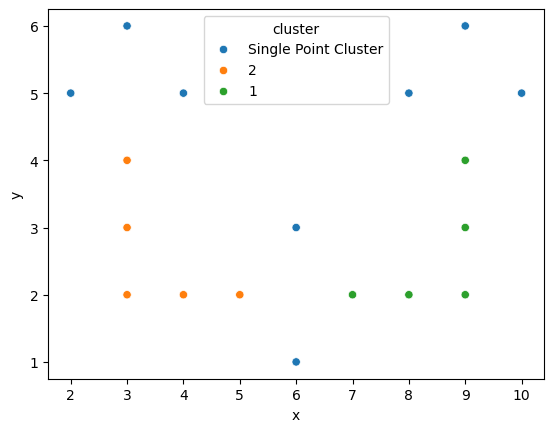

In [16]:
## (i)
# Agglomerative Clustering
# With minimum distance/single linkage the Agglomerative Clustering algorithm intitialzes every point
# as its own cluster and then merges the two closest clusters at each step.
# With a distance threshold given, the algorithm terminates once no two clusters are closer than the given distance.

def distance_matrix(points, metric='euclidean', printout=True, return_matrix=False):
    dist_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            if metric == 'euclidean':
                dist_matrix[i, j] = np.linalg.norm(points[i]-points[j])
            elif metric == 'manhattan':
                dist_matrix[i, j] = np.sum(np.abs(points[i]-points[j]))
    if printout:
        print('Distance Matrix')
        for i in range(len(points)):
            row = sorted(zip([f'd{j+1}' for j in range(len(points))], dist_matrix[i].round(2)), key=lambda x: x[1])
            print(f"d{i+1}:", row[1:5])
    if return_matrix:
        return dist_matrix

def visualize_clusters(points, threshold=4/3, metric='euclidean', linkage='single'):
    agg = AgglomerativeClustering(metric=metric, linkage=linkage, distance_threshold=threshold, n_clusters=None)
    agg.fit(points)
    print('Agglomerative Clustering')
    clusters = []
    for i,c in enumerate(agg.labels_):
        if sum(agg.labels_ == c) > 1:
            clusters.append(f"{c+1}")
        else:
            clusters.append("Single Point Cluster")
    results = pd.DataFrame({'Label':[f'd{i+1}' for i in range(len(points))],'x': points[:, 0], 'y': points[:, 1], 'cluster': clusters})
    sns.scatterplot(data=results, x='x', y='y', hue='cluster')
    # Imagine the Single Point Clusters are drawn red, which is something I tried to do but failed.
    distance_matrix(points, metric=metric)

visualize_clusters(points_a, threshold=4/3, metric='euclidean', linkage='single')

Minimum distance for a single big cluster: 1.4242
Agglomerative Clustering
Distance Matrix
d1: [('d2', 1.41), ('d3', 1.41), ('d4', 2.0), ('d5', 3.0)]
d2: [('d1', 1.41), ('d4', 1.41), ('d3', 2.0), ('d5', 2.24)]
d3: [('d1', 1.41), ('d4', 1.41), ('d2', 2.0), ('d5', 2.24)]
d4: [('d5', 1.0), ('d2', 1.41), ('d3', 1.41), ('d1', 2.0)]
d5: [('d4', 1.0), ('d6', 1.0), ('d7', 1.41), ('d2', 2.24)]
d6: [('d5', 1.0), ('d7', 1.0), ('d4', 2.0), ('d8', 2.0)]
d7: [('d6', 1.0), ('d8', 1.0), ('d5', 1.41), ('d4', 2.24)]
d8: [('d7', 1.0), ('d9', 1.41), ('d10', 1.41), ('d6', 2.0)]
d9: [('d8', 1.41), ('d11', 1.41), ('d10', 2.0), ('d7', 2.24)]
d10: [('d8', 1.41), ('d11', 1.41), ('d9', 2.0), ('d7', 2.24)]
d11: [('d12', 1.0), ('d9', 1.41), ('d10', 1.41), ('d8', 2.0)]
d12: [('d11', 1.0), ('d13', 1.0), ('d14', 1.41), ('d9', 2.24)]
d13: [('d12', 1.0), ('d14', 1.0), ('d11', 2.0), ('d15', 2.0)]
d14: [('d13', 1.0), ('d15', 1.0), ('d12', 1.41), ('d11', 2.24)]
d15: [('d14', 1.0), ('d16', 1.41), ('d17', 1.41), ('d13', 2.0

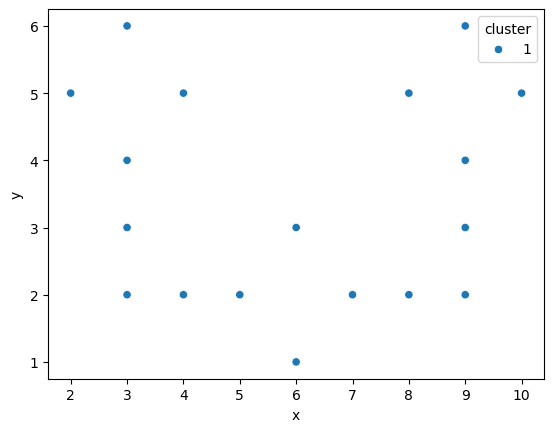

In [21]:
## (ii)
# Minimum distance for a single big cluster is the minimum distance distance between the most isolated point and
# its closest neighbor. In other words, so you can draw lines between all points and never draw a line longer than
# the minimum distance.

# For every point, contains the distance to all other points.
dist_matrix = distance_matrix(points_a, return_matrix=True, printout=False)

min_merge_distance = 0
for i in range(len(points_a)):
    closest_neighbor = np.min(dist_matrix[i][dist_matrix[i] != 0]) # Exclude 0, which is the distance to itself
    if closest_neighbor > min_merge_distance:
        min_merge_distance = closest_neighbor

min_merge_distance += 0.01 # Bit cheeky, but quick fix to make sure the threshold is not too low.

print(f"Minimum distance for a single big cluster: {min_merge_distance:.4f}")
visualize_clusters(points_a, threshold=min_merge_distance, metric='euclidean', linkage='single')

<Axes: >

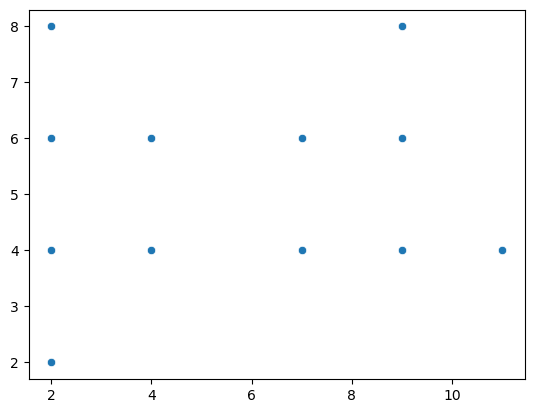

In [18]:
## (b)
# DBSCAN
points_b = [None]*(12)
x = "2 2 4 2 4 2 9 7 9 7 9 11".split()
y = "8 6 6 4 4 2 8 6 6 4 4 4".split()
for i in range(12):
    points_b[i] = (int(x[i]), int(y[i]))

points_b = np.array(points_b)
sns.scatterplot(x=points_b[:, 0], y=points_b[:, 1])

In [19]:
# DBSCAN  check for every point how many neighbors it has within distance of epsilon
# If the number of neighbors is greater than MinPts, the point is a core point.
# Core points that are neighbors are put in the same cluster. Non-core points that have a core point as their neighbor
# are put in the same cluster as the core point (closest core point). All other points are noise.
# If MinPts is 1, all points are core points and the algorithm is equivalent to single-linkage clustering.

epsilon = 2
for j in range(len(points_b)):
    classif = DBSCAN(eps=epsilon, min_samples=j+1, metric='manhattan').fit(points_b)
    print(f"MinPts: {j+1} -> At least {j} neighbors excluding itself within distance of {epsilon}")
    result = dict()
    for i, c in enumerate(classif.labels_):
        if c in result:
            result[c].append(f"d{i+1}")
        else:
            result[c] = [f"d{i+1}"]
    for k, v in result.items():
        print(f"\tCluster {k}: {v}")
    print(f"\tCore points: {' '.join(f'd{k+1}' for k in classif.core_sample_indices_)}")
    print(f"\tNon-core points: {' '.join(f'd{i+1}' for i in range(len(points_b)) if i not in classif.core_sample_indices_)}")
    print(f"\tNoise: {' '.join(f'd{i+1}' for i in range(len(points_b)) if classif.labels_[i] == -1)}")
    if len(np.unique(classif.labels_)) == 1:
        break

MinPts: 1 -> At least 0 neighbors excluding itself within distance of 2
	Cluster 0: ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
	Cluster 1: ['d7', 'd8', 'd9', 'd10', 'd11', 'd12']
	Core points: d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 d11 d12
	Non-core points: 
	Noise: 
MinPts: 2 -> At least 1 neighbors excluding itself within distance of 2
	Cluster 0: ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
	Cluster 1: ['d7', 'd8', 'd9', 'd10', 'd11', 'd12']
	Core points: d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 d11 d12
	Non-core points: 
	Noise: 
MinPts: 3 -> At least 2 neighbors excluding itself within distance of 2
	Cluster 0: ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
	Cluster 1: ['d7', 'd8', 'd9', 'd10', 'd11', 'd12']
	Core points: d2 d3 d4 d5 d8 d9 d10 d11
	Non-core points: d1 d6 d7 d12
	Noise: 
MinPts: 4 -> At least 3 neighbors excluding itself within distance of 2
	Cluster 0: ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
	Cluster 1: ['d7', 'd8', 'd9', 'd10', 'd11', 'd12']
	Core points: d2 d4 d9 d11
	Non-core points: d1 d3 d5 d6 d7 d8 d10